# Assignment 6: Mushroom Classification

## DTSC-680: Applied Machine Learning

## Name: Jillian Helmick

This notebook contains a complete workflow of a machine learning model that classifies mushrooms a edible or poisonous. Using the 'agaricus-lepiota' dataset, the model was trained on categorical features describing mushroom characteristics, and the target variable indicatior.

First, basic machine learning packages were installed. Initial exploration of the dataset, and the 'agaricus-lepiota.names' file was conducted. The .names data was then assigned as headers for the 'agaricus-lepiota.csv' data.

The data was then split into a training and a test set. 80% of the data was assigned to training, and 20% was assigned to testing. One-Hot Encoding was implemented to transform all categorical features into numerical format. This is essential for neural network input. The target labels were converted into numerical format. 0 and 1 were assigned to `e` for edible and `p` for poisonous.

The first model builds the initial neural network. The Sequential Neural Network contains two layers:
- An input layer matching the number of One-Hot Encoded features
- An output layer with a single neuron using sigmoid activation for binary classification.
The model was trained on the encoded training data and timed the training duration with Jupyter's '%time' magic. To evaluate the first model's performance on the test set, a Confusion Matrix was generated using Scikit-Learn. 

To further enhance the model, dimensionality reduction was conducted the Principal Component Analysis (PCA). PCA effectively reduced the number of features from the first model, 116, to 40 features. Ultimately, the computational complexity of the model was reduced while maintaining 95% of the variance. Then, the training and testing sets were transformed using the PCA model. 

The enhaced model was built using the PCA Neural Network. The new model was trained on the PCA-transformed data with the input dimensions adjusted to match the reduced feature set. The model was also timed on the training process to compare with the original model. Likewise, a confusion matrix was generated to analyze performance differences. 

Finally, the PCA-trained neural network was saved using TensorFlow's 'model.save'. Code to load the model is included in the final line of this workbook. 

This workbook, while developed on a simple dataset, can be applicable to various other binary classifications of data. Key features represent steps to prepare categorical data for neural networks, optimize with PCA, and effectively evaluate binary classification. 

In [ ]:
# Check for Tensorflow 
import subprocess
import sys
from IPython.display import clear_output
def check_tensorflow():
    tf_desired_version = "2.9.2"

    try:
        import tensorflow as tf
        tf_installed_version = tf.__version__
    except ImportError:
        tf_installed_version = None

    #Check for the right version
    if tf_installed_version != tf_desired_version:
        print(f"Current TensorFlow version: {tf_installed_version}. Installing version {tf_desired_version}...")
        
        # Uninstall the current TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', '-y', 'tensorflow'])
        
        # Install the desired TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', f'tensorflow=={tf_desired_version}'])

        clear_output()
        
        print(f"TensorFlow version {tf_desired_version} installed successfully. Please restart your kernel to apply the changes.")
    else:
        print(f"TensorFlow version {tf_desired_version} is already installed.")    

check_tensorflow()

In [1]:
# common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.patches import Rectangle
#from mtcnn.mtcnn import MTCNN
from mtcnn import MTCNN
%matplotlib inline
import pickle
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the CSV without headers to see raw structure
df_raw = pd.read_csv("agaricus-lepiota.csv", header=None)
# Explore the shape of the dataframe
print("Shape:", df_raw.shape)
df_raw.head() # explore the first 5 rows of the data

Shape: (8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# View contents of the .names file
with open("agaricus-lepiota.names", "r") as f:
    for i, line in enumerate(f):
        print(f"{i+1:02d}: {line.strip()}")

01: 1. Title: Mushroom Database
02: 
03: 2. Sources:
04: (a) Mushroom records drawn from The Audubon Society Field Guide to North
05: American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
06: A. Knopf
07: (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
08: (c) Date: 27 April 1987
09: 
10: 3. Past Usage:
11: 1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
12: Adjustment (Technical Report 87-19).  Doctoral disseration, Department
13: of Information and Computer Science, University of California, Irvine.
14: --- STAGGER: asymptoted to 95% classification accuracy after reviewing
15: 1000 instances.
16: 2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
17: and Coverage in Incremental Concept Learning. In Proceedings of
18: the 5th International Conference on Machine Learning, 73-79.
19: Ann Arbor, Michigan: Morgan Kaufmann.
20: -- approximately the same results with their HILLARY algorithm
21: 3. In the following references

In [7]:
# Question 1
# Build header list manually from the .names file
# Header names are encoded in the .names file lines 106-140
headers = ["class",  # target column
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat"
]

# Now read the CSV with these headers
import pandas as pd
df = pd.read_csv("agaricus-lepiota.csv", header=None, names=headers)

# view the first 5 rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
# Question 2
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=["class"]) #all features except target
y = df["class"] # target 

# Train/test split with stratification
# Split the data with 20% test size, 80% training size
# stratify=y splits the data while preserving class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Question 3
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encode features
# sparse=False will give a Numpy array instead of a sparse matrix, which will be required for Keras
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")  # new categories in the test set won't crash the model
X_train_enc = ohe.fit_transform(X_train)
X_test_enc = ohe.transform(X_test)

# Label Encode target
# Label Encoder will sort the classes alphabetically, so 'e' will become 0, and 'p' will become 1
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

print("Original features:", X_train.shape[1]) 
print("One-Hot Encoded features:", X_train_enc.shape[1]) 

Original features: 22
One-Hot Encoded features: 116


/Applications/anaconda3/envs/dtsc680/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Question 4
from tensorflow import keras
from tensorflow.keras import layers

# Get number of input features from the one-hot encoder
input_dim = X_train_enc.shape[1]

# Build the model
hist = keras.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),  # input layer
    layers.Dense(1, activation="sigmoid")         # output layer
])

# Compile the model
hist.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

2025-08-12 11:00:01.721038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Question 5
# Train the model with %%time to measure training duration
%time
hist_1 = hist.fit(X_train_enc, y_train_enc, validation_data=(X_test_enc, y_test_enc), epochs=10, batch_size=32, verbose=1)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Epoch 1/10
204/204 [==============================] - 1s 2ms/step - loss: 0.5822 - accuracy: 0.6915 - val_loss: 0.4119 - val_accuracy: 0.8523
Epoch 2/10
204/204 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8860 - val_loss: 0.2757 - val_accuracy: 0.8966
Epoch 3/10
204/204 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9188 - val_loss: 0.2090 - val_accuracy: 0.9249
Epoch 4/10
204/204 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9474 - val_loss: 0.1675 - val_accuracy: 0.9446
Epoch 5/10
204/204 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9623 - val_loss: 0.1387 - val_accuracy: 0.9637
Epoch 6/10
204/204 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9721 - val_loss: 0.1176 - val_accuracy: 0.9748
Epoch 7/10
204/204 [==============================] - 0s 2ms/step - loss: 0.1055

In [25]:
# Question 6
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict classes on test set (threshold 0.5)
y_pred_probs = hist.predict(X_test_enc)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

51/51 [==============================] - 0s 2ms/step


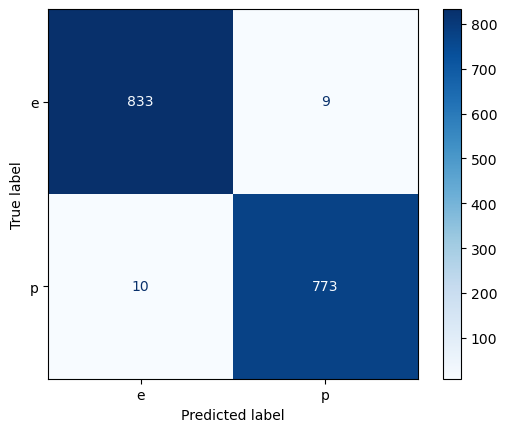

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test_enc, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
# Question 7
from sklearn.decomposition import PCA

# Initialize PCA to keep 95% variance
pca = PCA(n_components=0.95)

# Fit PCA on training data and transform both train and test
X_train_pca = pca.fit_transform(X_train_enc)
X_test_pca = pca.transform(X_test_enc)

In [21]:
# Question 8
# Build new model for PCA data (same architecture: input + output)
input_dim_pca = X_train_pca.shape[1]

hist2 = keras.Sequential([layers.InputLayer(input_shape=(input_dim_pca,)), layers.Dense(1, activation="sigmoid")])

hist2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model with timing
%time
hist_2 = hist2.fit(X_train_pca, y_train_enc, validation_data=(X_test_pca, y_test_enc), epochs=10, batch_size=32, verbose=1)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
Epoch 1/10
204/204 [==============================] - 1s 2ms/step - loss: 0.6702 - accuracy: 0.6142 - val_loss: 0.5844 - val_accuracy: 0.7489
Epoch 2/10
204/204 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.8135 - val_loss: 0.4740 - val_accuracy: 0.8855
Epoch 3/10
204/204 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.9178 - val_loss: 0.3924 - val_accuracy: 0.9391
Epoch 4/10
204/204 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.9480 - val_loss: 0.3316 - val_accuracy: 0.9495
Epoch 5/10
204/204 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.9574 - val_loss: 0.2853 - val_accuracy: 0.9575
Epoch 6/10
204/204 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.9618 - val_loss: 0.2498 - val_accuracy: 0.9606
Epoch 7/10
204/204 [==============================] - 0s 2ms/step - loss: 0.2315 - a

51/51 [==============================] - 0s 1ms/step


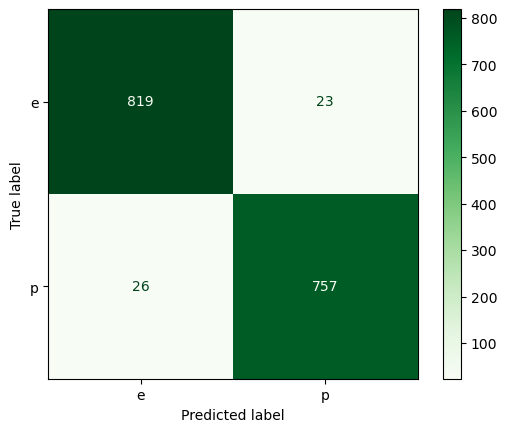

In [23]:
# Question 9
# Predict on PCA test data
y_pred_probs_pca = hist2.predict(X_test_pca)
y_pred_pca = (y_pred_probs_pca >= 0.5).astype(int).flatten()

# Confusion matrix
cm_pca = confusion_matrix(y_test_enc, y_pred_pca)

# Display confusion matrix
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=le.classes_)
disp_pca.plot(cmap=plt.cm.Greens)
plt.show()

Question 10

How many features does the data have after the One-Hot Encoding? How does this compare to the number of features that the data had before the encoding?
- Before encoding, the data has 23 features. However, after One-Hot Encoding, the data has 116 features. Each feature with multiple categories becomes multiple binary columns.
- Verified by running:
  - print("Original features:", X_train.shape[1])  
  - print("One-Hot Encoded features:", X_train_enc.shape[1]) 

What should the units parameter of the output layer in the network be and why?
- The output_layer = 1. To predict a binary classification (edible = 0 or poisonous = 1), a single neuron with a sigmoid activation outputs values between 0 and 1 representing that probability. 

How many connections does your neural network contain?
- The neural network contains 117 connections. This is verified by running hist.summary().

How many features does the training data contain after dimensionality reduction? How does this compare with the encoded data? 
- After PCA with 95% variance, the feature count reduces from 116 to 40.
- Verified by running:
  - print("One-Hot Encoded features:", X_train_enc.shape[1])
  - print("PCA components:", X_train_pca.shape[1])

Why does the input_dim parameter of the first layer need to change from the previous neural network? 
- The number of features must match the input shape. After PCA, the model has fewer features, so the shap needed to be updated. Errors would occur if the model doesn't align witht he shape. 

Compare the training time of the original neural network with the training time of the PCA neural network. Are the results what you expected? 
- Time before PCA:
  - CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
  - Wall time: 7.87 µs
- Time after PCA:
  - CPU times: user 3 µs, sys: 1 µs, total: 4 µs
  - Wall time: 7.15 µs
- This result is as expected because the time after PCA is lower than before PCA. With fewer feature, the model runs faster.

In [33]:
#hist.summary()
print("One-Hot Encoded features:", X_train_enc.shape[1])
print("PCA components:", X_train_pca.shape[1])


One-Hot Encoded features: 116
PCA components: 40


In [ ]:
# Question 11
# Save the model to a folder (creates a directory named 'mushroom_pca_model')
model_2.save("mushroom_pca_model")
print("Model saved!")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model from disk
loaded_model = load_model("mushroom_pca_model")
print("Model loaded successfully!")

# Optionally test prediction to confirm
sample_pred = loaded_model.predict(X_test_pca[:5])
print("Sample predictions:", sample_pred.flatten())